In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv("../input/titanic/train.csv")#import the dataset
test=pd.read_csv("../input/titanic/train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#store the passengerid of test data
passenger_id=test["PassengerId"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#set the index as passengerid
train.set_index(["PassengerId"],inplace=True)
test.set_index(["PassengerId"],inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Checking the missing data:
train.isnull().sum()#show the missing datas

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
100*(train.isnull().sum()/len(train))
def missing_values_percent(train):#we can use this function in all dataframes.
    nan_percent=100*(train.isnull().sum()/len(train))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent=missing_values_percent(train)
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [10]:
# Imputer age coloumn
from sklearn.impute import SimpleImputer
#train data             
Imp=SimpleImputer(strategy='median')
new_train=Imp.fit_transform(train.Age.values.reshape(-1,1))
train['Age2'] = new_train

#test data
new_test=Imp.fit_transform(test.Age.values.reshape(-1,1))
test['Age2'] = new_test


train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)


train.head()


,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [11]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2          0
dtype: int64

In [12]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#So we can replace missing datas in Embarked with s
train["Embarked"].fillna("s",inplace=True)

In [14]:
#cabin has 327 missing datas so we can get rid of it by dropping this feature.
train.drop("Cabin",axis=1,inplace=True)

In [15]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age2        0
dtype: int64

In [16]:
train["Survived"].value_counts(normalize=True)#How many passengers survived?


0    0.616162
1    0.383838
Name: Survived, dtype: float64

#EDA

In [17]:
def bar_chart_stacked(dataset,feature,stacked=True):
  survived=train[train["Survived"]==1][feature].value_counts()
  dead=train[train["Survived"]==0][feature].value_counts()   
  df_survived_dead=pd.DataFrame([survived,dead])  
  df_survived_dead.index=["passengers survived","passengers died"]   
  df_survived_dead.plot(kind="bar",stacked=stacked,figsize=(8,5))
                              

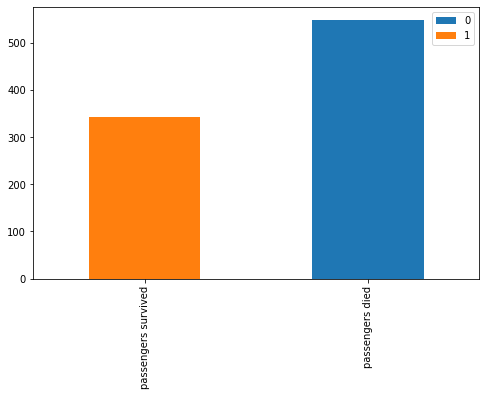

In [18]:
bar_chart_stacked(train,"Survived")

In [19]:
train["Sex"].value_counts().to_frame()#passengers count on gender

,Sex
male,577
female,314


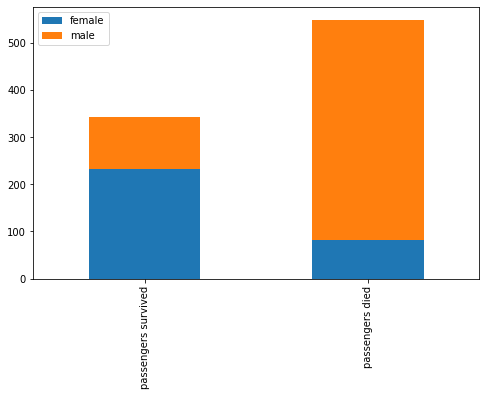

In [20]:
bar_chart_stacked(train,"Sex")#compare the survived  and dead passengers counts on gender

In [21]:
train.groupby(["Pclass"])["Survived"].mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


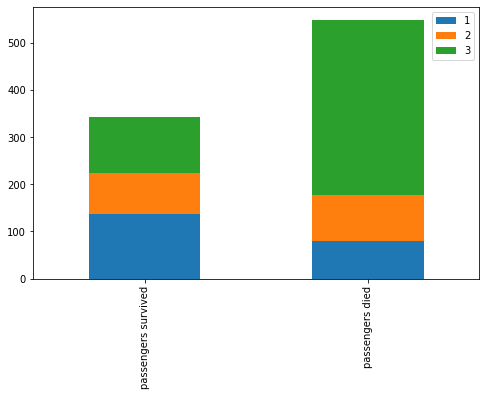

In [22]:
bar_chart_stacked(train,"Pclass")

In [23]:
def bar_chart_compare(dataset,feature1,feature2=None):
    plt.figure(figsize=(8,5))
    plt.title("survived rate by sex and pclass")
    g=sns.barplot(x=feature1,y="Survived",hue=feature2,data=dataset).set 

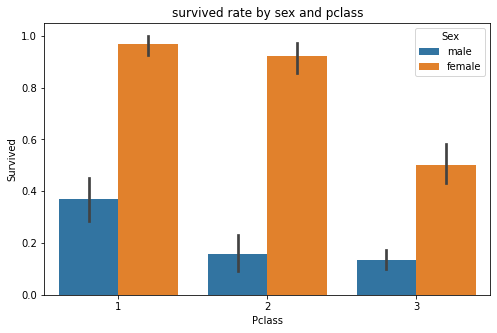

In [24]:
bar_chart_compare(train,"Pclass","Sex")

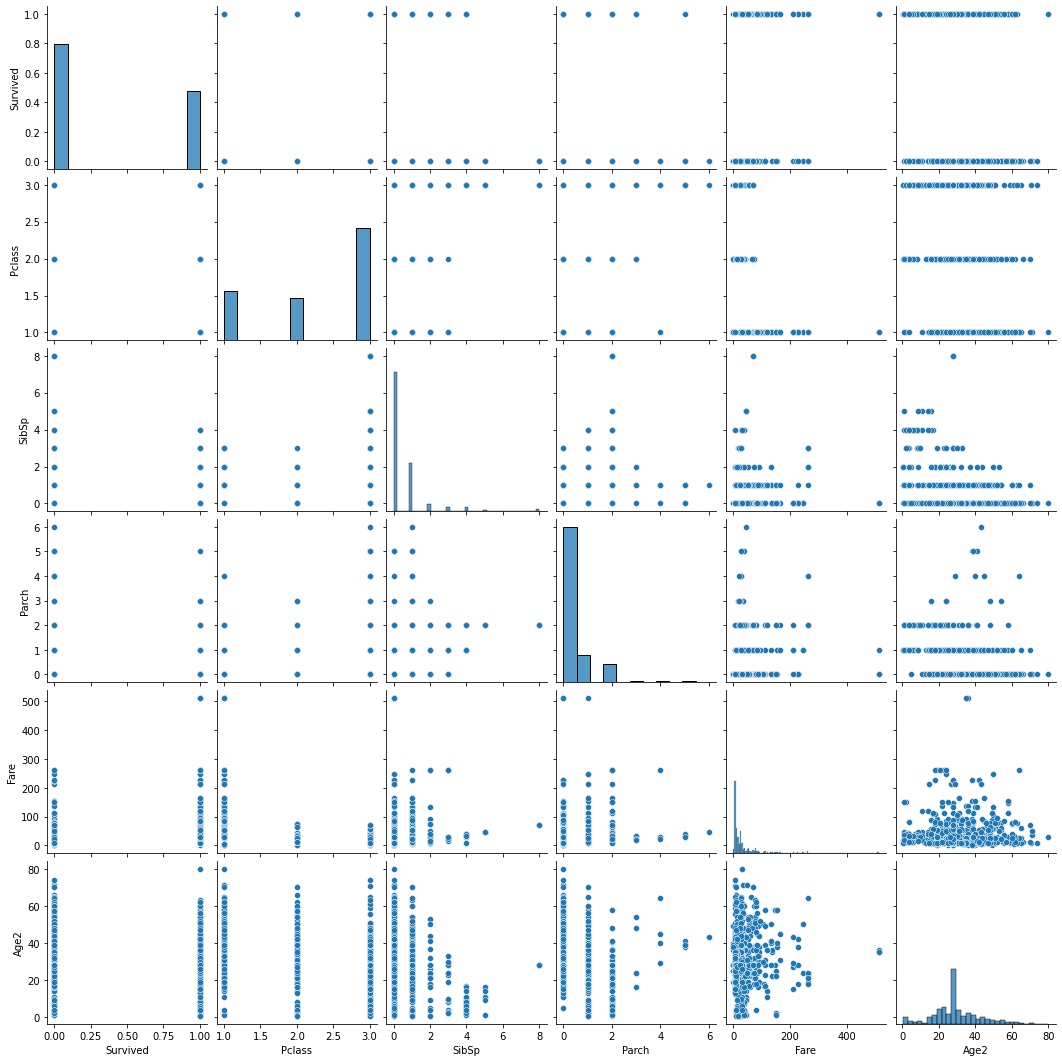

In [25]:
sns.pairplot(train)

<AxesSubplot:>

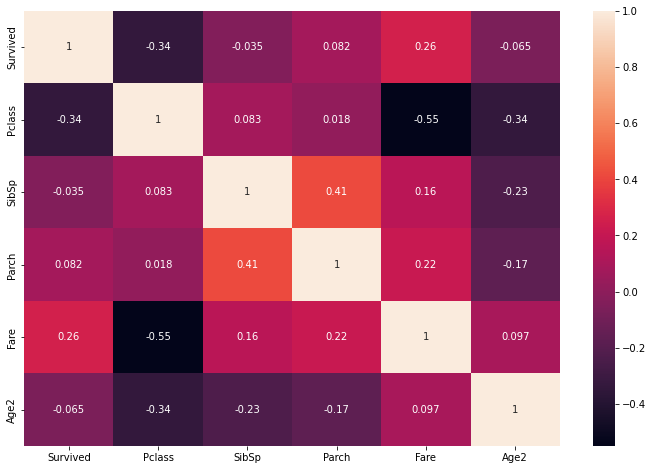

In [26]:
corr = train.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True)

**Feature Engineering**

In [27]:
train["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [28]:
train['Title'] =train['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0].strip())
test['Title'] =train['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0].strip())
train["Title"].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [29]:
train["family_size"]=train["SibSp"]+train["Parch"]+1

In [30]:
def family_group(size):
    a=""
    if(size<=1):
        a="alone"
    elif(size<=4):
        a="small"
    else:
        a="large"
    return a

In [31]:
train["family_group"]=train["family_size"].map(family_group)
train["fare_per_person"]=train["Fare"]/train["family_size"]
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,Title,family_size,family_group,fare_per_person
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0,Mr,2,small,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0,Mrs,2,small,35.64165
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0,Miss,1,alone,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0,Mrs,2,small,26.55000
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0,Mr,1,alone,8.05000


<AxesSubplot:xlabel='family_group', ylabel='Survived'>

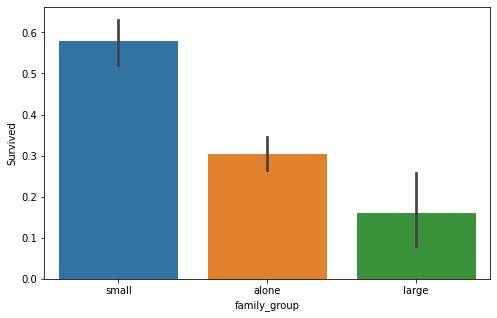

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(data=train,x="family_group",y="Survived")

In [33]:
train.drop(["Ticket"],axis=1,inplace=True)#This feature doesnt give us any useful infomation.

In [34]:
train["Pclass"].apply(str)

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: object

In [35]:
#Divide dataframe to 2 parts(num and str)
train_num=train.select_dtypes(exclude="object")
train_obj=train.select_dtypes(include="object")

In [36]:
train_obj=pd.get_dummies(train_obj,drop_first=True)#use one-hot encoding to transform str to int and float
train_obj.shape

(891, 912)

In [37]:
Final_train=pd.concat([train_num,train_obj],axis=1)
Final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Columns: 920 entries, Survived to family_group_small
dtypes: float64(3), int64(5), uint8(912)
memory usage: 888.5 KB


In [38]:
#Determine the feature and lable
X=Final_train.drop("Survived",axis=1)
y=Final_train["Survived"]


In [39]:
#Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [40]:
from sklearn.preprocessing import StandardScaler#scaling the features
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [43]:
accuracy_score(y_test, y_pred)

0.8022388059701493

In [44]:
confusion_matrix(y_test, y_pred)

array([[138,  16],
       [ 37,  77]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.83      0.68      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268



In [46]:
# Preparing data for submission
column_names = ['PassengerId', 'Survived']
Submission = pd.DataFrame(columns = column_names)

Submission['PassengerId'] = pd.read_csv('../input/titanic/test.csv')['PassengerId']
Submission['Survived'] = pd.DataFrame(gender_submission)
Submission.reset_index(drop=True, inplace=True)

# Saving prediction
Submission.to_csv(r'./submission.csv', index=False)
Submission.head()

NameError: name 'gender_submission' is not defined